In [1]:
from numpy import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# flip a fair coin

def cointoss():
    return random.choice(["Heads", "Tails"])

In [3]:
# run a strategy

def run_strategy(game, prob):

    x = random.binomial(n=1, p=prob, size=1)
    #print("Run Strategy result: {}".format(x[0]))

    return x[0]

In [4]:
# view the results of the strategy followed by Beauty
def strategy_results(game, witch_choice, beauty_choices):
    strategy_status = ""
    #print("View the results of the strategy followed by Beauty. Results: {}".format(beauty_choices))
    if game == 1:
        last_choice = beauty_choices[-1]
        #print("print the last element: {} ".format(last_choice))
        if witch_choice == "Tails":
            #print("Prince is Poisoned and the flask contains antidote")
            if last_choice == 0:
                #print("Beauty says to Price to DRINK")
                #print("Prince is getting Healthy")
                strategy_status = "Healthy"
            else: 
                #print("Beauty says to Price to NOT to Drink")
                #print("Prince Dies")
                strategy_status = "Dead"
        else: # "Heads"
            #print("Prince is healthy and the flask contains poison")
            if last_choice == 0:
                #print("Beauty says to Price to DRINK")
                #print("Prince Dies")
                strategy_status = "Dead"
            else:
                #print("Beauty says to Price to NOT to Drink")
                #print("Prince is getting Healthy")
                strategy_status = "Healthy"
            
    elif game == 2:
        #print("2")
        if witch_choice == "Tails":
            final_choice = beauty_choices[0] ^ beauty_choices[1]
            if final_choice == 0:
                strategy_status = "Healthy"
            else: 
                strategy_status = "Dead"
        else:
            final_choice = beauty_choices[0]
            if final_choice == 0:
                strategy_status = "Dead"
            else: 
                strategy_status = "Healthy"
        #print("Strategy results: {}".format(final_choice))      
    elif game == 3:
        #print("3")
        if witch_choice == "Tails":
            final_choice = beauty_choices[0] + beauty_choices[1]
        else:
            if beauty_choices[0] == 0:
                final_choice = 1
            else:
                final_choice = 0
        #print("Strategy results: {}".format(final_choice))
        strategy_status = str(final_choice)
    else :
        #print("4")
        if witch_choice == "Tails":
            final_choice = beauty_choices[0] + beauty_choices[1]
        else:
            if beauty_choices[0] == 0:
                final_choice = 1 * 2
            else:
                final_choice = 0 * 2
        #print("Strategy results: {}".format(final_choice))
        strategy_status = str(final_choice)
        
    return strategy_status
    

Basic experiment

In [5]:
# Run an experiment

def run_an_experiment(game, prob, verbose = False):
    # beauty's choices when runs her strategy
    beauty_choices = []
    # flip a fair coin
    witch_choice = cointoss()

    #print(witch_choice)
    #print("Flip a fair coin! The result is {} ".format(witch_choice))
    if witch_choice == "Tails":
        #print("Beauty wakes up!")
        choice = run_strategy(game, prob)
        beauty_choices.append(choice)
        #print("Beauty is sleeping!")
        #print("Beauty wakes up!")
        choice = run_strategy(game, prob)
        beauty_choices.append(choice)
    else :
        #print("Beauty is sleeping!")
        #print("Beauty wakes up!")
        choice = run_strategy(game, prob)
        beauty_choices.append(choice)
        #print("Beauty is sleeping!")
    experiment_status = strategy_results(game, witch_choice, beauty_choices)
    if verbose:
        print("Coin: {}, Beauty's strategy choices: {}, Experiment result: {} ".format(witch_choice, beauty_choices,experiment_status  ))
    return experiment_status, witch_choice

In [6]:
def run_a_game(N, game, prob, verbose):
    print("Game {} runs with strategy p={}".format(game, prob))
    experiments = []
    frequencies = []
    witch_choices = []
    temp_a = []
    temp_b = []
    temp_witch_choice = 0
    if game == 1 or game == 2:
        count_of_healthy = 0
        for i in range(N):
            experiment_status, witch_choice = run_an_experiment(game, prob, verbose)
            experiments.append(experiment_status)
            if experiment_status == "Healthy":
                count_of_healthy = count_of_healthy + 1
            #print("I= {} and count_of_healthy={}".format(i, count_of_healthy))
            freq = count_of_healthy / (i+1)
            frequencies.append(freq)
    elif game == 3:
        sum_experiments = 0
        sum_witch_choices = 0
        for i in range(N):

            experiment_status, witch_choice = run_an_experiment(game, prob, verbose)
            if witch_choice == "Tails":
                temp_witch_choice = 2
                witch_choices.append(2)
            else:
                temp_witch_choice = 1
                witch_choices.append(1)
            experiments.append(int(experiment_status))
            #print("Experiments: {} ".format(experiments))
            #print("Witch_choices: {} ".format(witch_choices))
            if i == 0:
                temp_a.append(experiments[0])
                sum_experiments = experiments[0]
                temp_b.append(witch_choices[0])
                sum_witch_choices = witch_choices[0]
            else:
                sum_experiments = sum_experiments + int(experiment_status)
                temp_a.append(sum_experiments)

                sum_witch_choices = sum_witch_choices + int(temp_witch_choice)
                temp_b.append(sum_witch_choices)
                

            #print("Temp_A: {} ".format(temp_a))
            #print("Temp_B: {} ".format(temp_b))

            freq = temp_a[i] / temp_b[i]
            frequencies.append(freq)
    else :
        #print("4")
        sum_experiments = 0
        sum_witch_choices = 0
        for i in range(N):

            experiment_status, witch_choice = run_an_experiment(game, prob, verbose)
            temp_witch_choice = 2
            witch_choices.append(2)
            experiments.append(int(experiment_status))
            #print("Experiments: {} ".format(experiments))
            #print("Witch_choices: {} ".format(witch_choices))
            if i == 0:
                temp_a.append(experiments[0])
                sum_experiments = experiments[0]
                temp_b.append(witch_choices[0])
                sum_witch_choices = witch_choices[0]
            else:
                sum_experiments = sum_experiments + int(experiment_status)
                temp_a.append(sum_experiments)

                sum_witch_choices = sum_witch_choices + int(temp_witch_choice)
                temp_b.append(sum_witch_choices)
                

            #print("Temp_A: {} ".format(temp_a))
            #print("Temp_B: {} ".format(temp_b))

            freq = temp_a[i] / temp_b[i]
            frequencies.append(freq)

    #print("Experiments: {} ".format(experiments))
    #print("Temp_A: {} ".format(temp_a))
    #print("Witch_choices: {} ".format(witch_choices))
    #print("Temp_B: {} ".format(temp_b))
    #print("Frequencies: {} ".format(frequencies))
    
    ar = np.arange(1, N+1, 1)
    plt.clf()
    plt.figure(figsize=(10,8))
    plt.scatter(ar, frequencies)
    title = "Expected value when running Game #" + str(game) + " with p = " + str(prob)
    plt.title(title)
    plt.xlabel("Experiments")
    plt.ylabel("Frequencies")
    plt.annotate('%0.2f' % frequencies[-1], xy=(1, frequencies[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
    plt.ylim(0, 1)

    #plt.grid()
    plt.show()

Game 1 runs with strategy p=0.1


<Figure size 432x288 with 0 Axes>

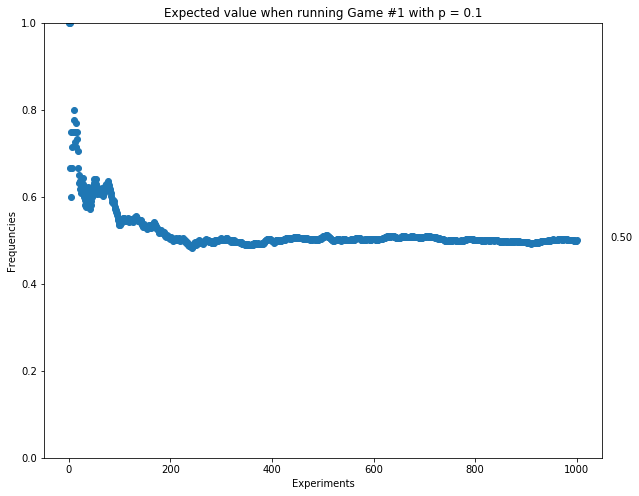

In [7]:
# The prince's survival rate for p close to zero.

N = 1000 # number of experiments
prob = 0.1 # probability <------ Try to modify it!
game = 1 # number of game to be examined (valid values: 1-4)  <------ please set it up
run_a_game(N, game, prob, verbose = False)

Game 1 runs with strategy p=0.5


<Figure size 432x288 with 0 Axes>

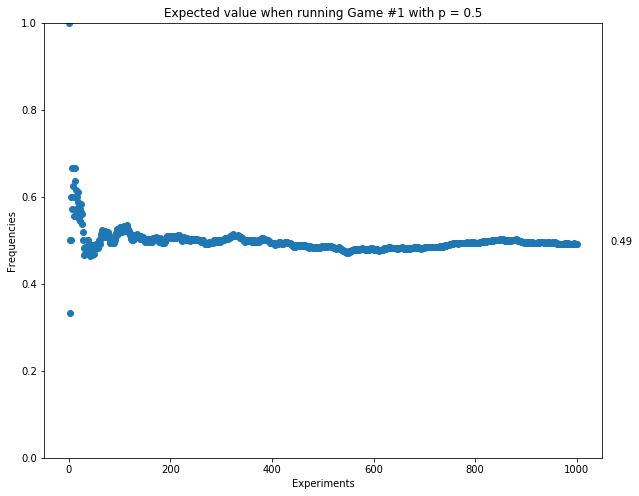

In [19]:
# The prince's survival rate for p = 1/2.

N = 1000 # number of experiments
prob = 0.5 # probability <------ Try to modify it!
game = 1 # number of game to be examined (valid values: 1-4)  <------ please set it up
run_a_game(N, game, prob, verbose = False)

Game 2 runs with strategy p=0.5


<Figure size 432x288 with 0 Axes>

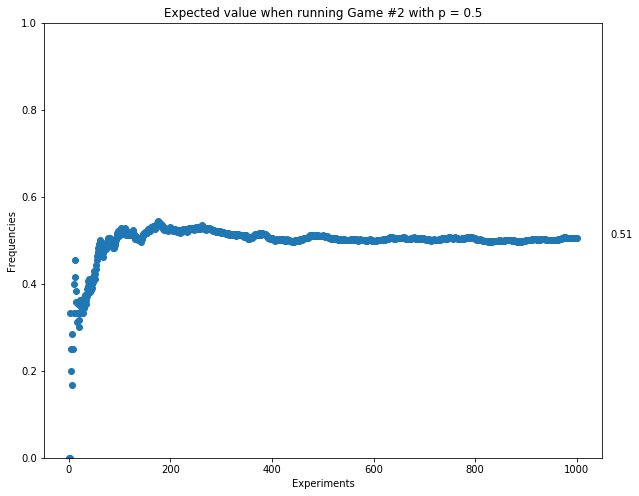

In [20]:
# The prince's survival rate for p = 1/2

N = 1000 # number of experiments
prob = 0.5 # probability <------ Try to modify it!
game = 2 # number of game to be examined (valid values: 1-4)  <------ please set it up
run_a_game(N, game, prob, verbose = False)

Game 2 runs with strategy p=1


<Figure size 432x288 with 0 Axes>

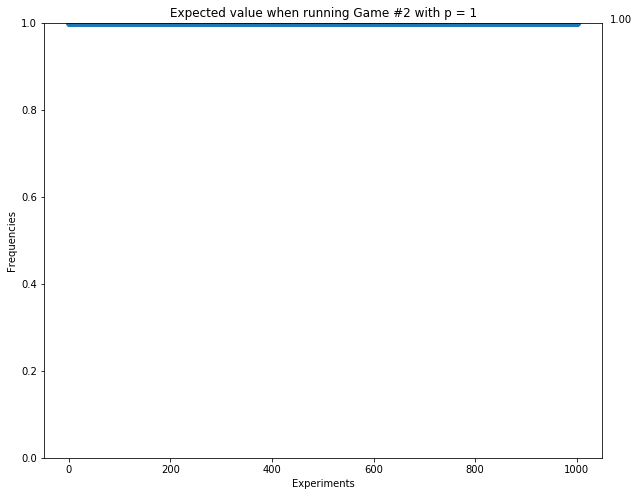

In [10]:
# The prince's survival rate for p = 1. Sleeping Beauty always saves the prince. 

N = 1000 # number of experiments
prob = 1 # probability <------ Try to modify it!
game = 2 # number of game to be examined (valid values: 1-4)  <------ please set it up
run_a_game(N, game, prob, verbose = False)

Game 3 runs with strategy p=0.5


<Figure size 432x288 with 0 Axes>

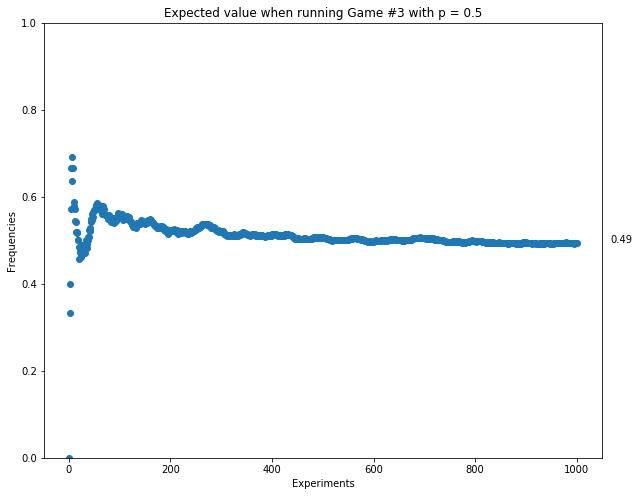

In [11]:
# Percentage of stones collected for p = 1/2. 

N = 1000 # number of experiments
prob = 0.5 # probability <------ Try to modify it!
game = 3 # number of game to be examined (valid values: 1-4)  <------ please set it up
run_a_game(N, game, prob, verbose = False)

Game 3 runs with strategy p=1


<Figure size 432x288 with 0 Axes>

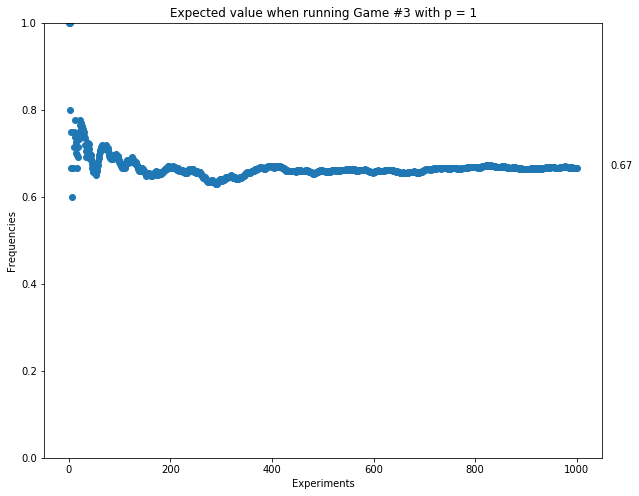

In [22]:
# Percentage of stones collected for p = 1. Only one third of the stones are missed.

N = 1000 # number of experiments
prob = 1 # probability <------ Try to modify it!
game = 3 # number of game to be examined (valid values: 1-4)  <------ please set it up
run_a_game(N, game, prob, verbose = False)

Game 4 runs with strategy p=0.5


<Figure size 432x288 with 0 Axes>

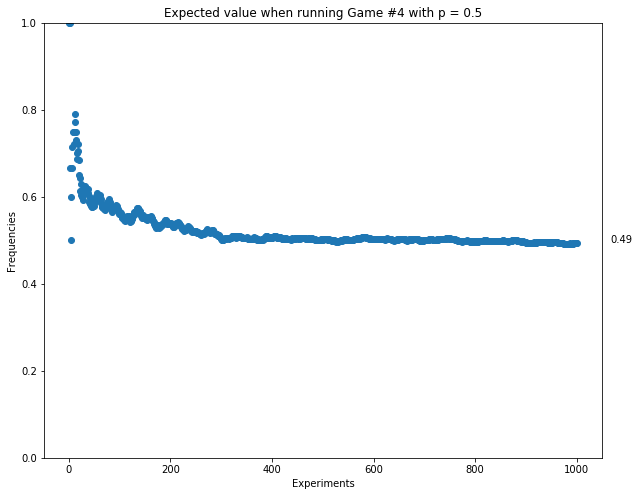

In [29]:
# Average utility after 1000 experiments with p = 1/2.

N = 1000 # number of experiments
prob = 1/2 # probability <------ Try to modify it!
game = 4 # number of game to be examined (valid values: 1-4)  <------ please set it up
run_a_game(N, game, prob, verbose = False)

Game 4 runs with strategy p=1


<Figure size 432x288 with 0 Axes>

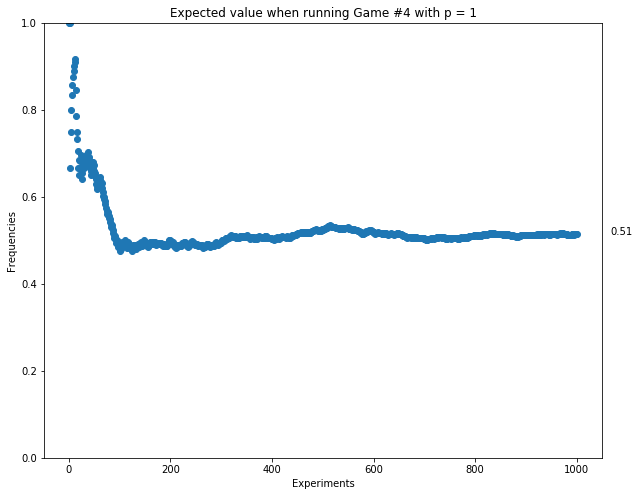

In [39]:
# Average utility after 1000 experiments with p = 1.

N = 1000 # number of experiments
prob = 1 # probability <------ Try to modify it!
game = 4 # number of game to be examined (valid values: 1-4)  <------ please set it up
run_a_game(N, game, prob, verbose = False)